## Estadística aplicada
Sesión 10 - 15 septiembre

Cecilia Sarahí Gutiérrez Padilla 1953437 Gpo 43

In [1]:
#librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#liberías especializadas
from lifelines import CoxPHFitter, ExponentialFitter, WeibullFitter, LogNormalFitter
import seaborn as sns

In [3]:
## datos
df_cancer=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')

Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:

**inst**: código de institución\
**time (d1)**: tiempo de supervivencia en días\
**status (d2)**: estado de censura 1 = censurado, 2 = muerto\
**age (i1)**: Edad en años\
**sex (i2)**: Masculino = 1 Femenino = 2\
**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\
**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\
**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\
**meal.cal (i5)**: Calorías consumidas en las comidas\
**wt.loss (i6)**: Pérdida de peso en los últimos seis meses

In [4]:
df_cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [5]:
## depurar la base
df_cancer['status']=df_cancer['status']-1
df_cancer['sex']=df_cancer['sex']-1
##status 0: censura, 1: muerte
##sex 0: hombres, 1: mujeres
## eliminar la variable inst
df_cancer=df_cancer.drop('inst', axis= 1)

In [6]:
## verficar que las variables sean numéricas
df_cancer.dtypes

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [9]:
## convertir en entero ph.eco

In [10]:
##verificar missing values (valores perdidos)
df_cancer.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [11]:
## valores perdidos hay dos opciones: imputar (asignar valores), 2: eliminar los valores perdidos
## vamos imputar los missing values con el promedio
df_cancer['ph.karno']= df_cancer['ph.karno'].fillna(df_cancer['ph.karno'].mean())
media_patkarno= df_cancer['pat.karno'].mean()
media_cal=df_cancer['meal.cal'].mean()
media_loss=df_cancer['wt.loss'].mean()

df_cancer['pat.karno']= df_cancer['pat.karno'].fillna(media_patkarno)
df_cancer['meal.cal']= df_cancer['meal.cal'].fillna(media_cal)
df_cancer['wt.loss']= df_cancer['wt.loss'].fillna(media_loss)

In [12]:
## eliminar missing values ph.ecog
df_cancer= df_cancer.dropna()

In [13]:
df_cancer['ph.ecog']=df_cancer['ph.ecog'].astype('int64')

In [14]:
df_cancer.dtypes

time           int64
status         int64
age            int64
sex            int64
ph.ecog        int64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [20]:
## lifelines no acepta variables categoricas
## lifelines solo admite dummies y continuas
## vamos a convertir ph.ecog en dummies
dummies= pd.get_dummies(df_cancer['ph.ecog'], prefix='ecog').astype(int)

In [22]:
dummies=dummies[['ecog_1', 'ecog_2']]
df_cancer= pd.concat([df_cancer, dummies], axis=1)

In [24]:
df_cancer= df_cancer.drop('ph.ecog', axis=1)

In [25]:
df_cancer.head()

,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1,ecog_2
0,306,1,74,0,90.0,100.0,1175.000000,9.831776,1,0
1,455,1,68,0,90.0,90.0,1225.000000,15.000000,0,0
2,1010,0,56,0,90.0,90.0,928.779006,15.000000,0,0
3,210,1,57,0,90.0,60.0,1150.000000,11.000000,1,0
4,883,1,60,0,100.0,90.0,928.779006,0.000000,0,0


In [26]:
df_cancer.isna().sum()

time         0
status       0
age          0
sex          0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
ecog_1       0
ecog_2       0
dtype: int64

In [28]:
df_cancer.dtypes

time           int64
status         int64
age            int64
sex            int64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
ecog_1         int32
ecog_2         int32
dtype: object

In [30]:
##estadisticas descriptivas
df_cancer.describe()

,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1,ecog_2
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,306.264317,0.722467,62.458150,0.396476,82.034971,79.999413,927.474067,9.734118,0.497797,0.220264
std,210.532764,0.448771,9.092045,0.490246,12.240894,14.543193,358.375611,12.670492,0.501100,0.415341
min,5.000000,0.000000,39.000000,0.000000,50.000000,30.000000,96.000000,-24.000000,0.000000,0.000000
25%,168.500000,0.000000,56.000000,0.000000,80.000000,70.000000,768.000000,0.000000,0.000000,0.000000
50%,259.000000,1.000000,63.000000,0.000000,80.000000,80.000000,928.779006,8.000000,0.000000,0.000000
75%,399.000000,1.000000,69.000000,1.000000,90.000000,90.000000,1075.000000,15.000000,1.000000,0.000000
max,1022.000000,1.000000,82.000000,1.000000,100.000000,100.000000,2600.000000,68.000000,1.000000,1.000000


El 72% de los individuos murieron, el 39.6% son mujeres, el promedio de edad es de 62.4 años, el más joven 39 y el más grande tiene 82,los pacientes consideran su estado de salud peor de lo que realmente están, si bien en promedio perdieron peso también existen observaciones que aumentaron de peso

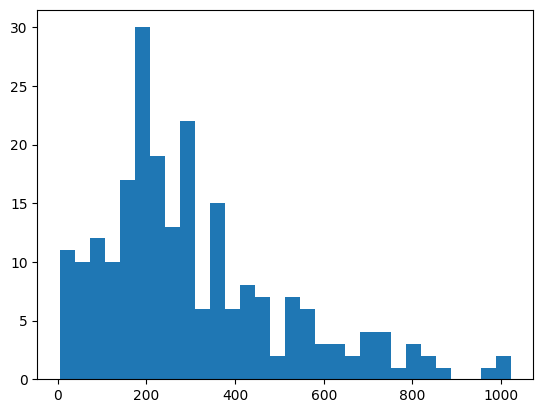

In [31]:
plt.hist(df_cancer['time'], bins=30)
plt.show()

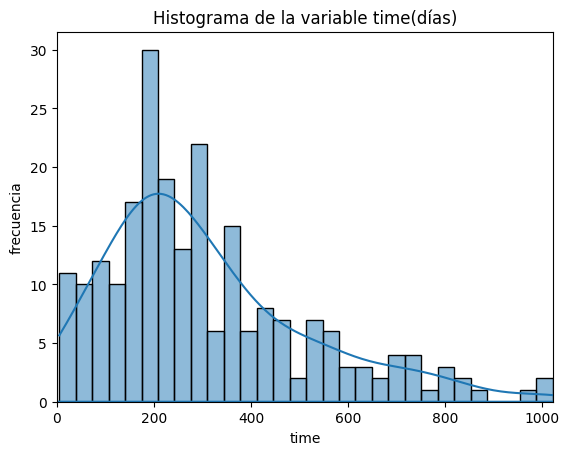

In [33]:
sns.histplot(df_cancer['time'], bins=30, kde='true')
sns.kdeplot(df_cancer['time'])
plt.xlim(0,1022)
plt.ylabel('frecuencia')
plt.title('Histograma de la variable time(días)')
plt.show()

In [34]:
##Estimar el modelo
cph1= CoxPHFitter().fit(df_cancer, 'time', 'status')
cph1.print_summary()

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 164
   partial log-likelihood = -726.94
         time fit was run = 2023-09-15 21:23:38 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.58       0.56       0.17            -0.92            -0.25                 0.40                 0.78
ph.karno    0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
ecog_1      0.56       1.74       0.24             0.09             1.02                 1.10                 2.77
ecog_2      1.08       2.94       0.37             0.35             1.80                 1.43                 6.08

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.37   0.17       2.54
sex           0.00 -3.41 <0.005      10.59
ph.karno      0.00  1.37   0.17       2.56
pat.karno     0.00 -1.82   0.07       3.87
meal.cal      0.00  0.11   0.92       0.13
wt.loss       0.00 -1.65   0.10       3.35
ecog_1        0.00  2.35   0.02       5.74
ecog_2        0.00  2.92 <0.005       8.15
---
Concordance = 0.65
Partial AIC = 1469.88
log-likelihood ratio test = 35.08 on 8 df
-log2(p) of ll-ratio test = 15.24

Las variables age, ph.karno, pat.karno, meal.cal, wt.loss no tienen efecto en el riesgo de morir de cancer.

Las mujeres tienen menos riesgo de morir de cancer que los hombres, las mujeres tienen 44% menos riesgo de morir de cancer que los hombres.

un ambulatorio 74% más riesgo de morir de cancer que un asintomatico.

Alguien sintomatico que esta en la cama menos del 50% del día tiene 194% más riesgo de morir de cancer en comparación de un asintomático.

In [36]:
cph1.check_assumptions(df_cancer, p_value_threshold=0.05)
## Ho: se viola supuesta de riesgo proporcional constante
## Ha No se vioa supuesto de riesgo proporcional constante

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              0.35 0.55      0.86
          rank            0.14 0.71      0.50
ecog_1    km              2.31 0.13      2.96
          rank            2.14 0.14      2.80
ecog_2    km              1.88 0.17      2.55
          rank            1.47 0.23      2.15
meal.cal  km              5.13 0.02      5.41
          rank            4.53 0.03      4.91
pat.karno km              0.26 0.61      0.71
          rank            0.21 0.65      0.62
ph.karno  km              4.76 0.03      5.10
          rank            4.13 0.04      4.57
sex       km              2.71 0.10      3.33
          rank            2.58 0.11      3.21
wt.loss   km              0.01 0.93      0.11
          rank            0.04 0.85      0.24



1. Variable 'ph.karno' failed the non-proportional test: p-value is 0.0292.

   Advice 1: the functional form of the variable 'ph.karno' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ph.karno' using pd.cut, and then specify it in
`strata=['ph.karno', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'meal.cal' failed the non-proportional test: p-value is 0.0235.

   Advice 1: the functional form of the variable 'meal.cal' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional

[]

Este modelo de Cox no cumple el supuesto de riesgo proporcional constante, debemos de utilizar AFT "modelo de riesgo acelerado"

In [37]:
### para APT debemos determinar primero si es exponencial, weibull o lognormal
mexpo= ExponentialFitter().fit(df_cancer['time'], df_cancer['status'])
mweibull=WeibullFitter().fit(df_cancer['time'], df_cancer['status'])
mlogn=LogNormalFitter().fit(df_cancer['time'], df_cancer['status'])

In [39]:
## criterio AIC (menor valor=mejor)
mexpo.AIC_.round(2), mweibull.AIC_.round(2), mlogn.AIC_.round(2)

(2314.25, 2298.86, 2330.35)

El mejor modelo es el Weibull, por tanto es el que utilizaremos para el AFT

In [41]:
from lifelines import WeibullAFTFitter

In [42]:
weibullAFT= WeibullAFTFitter().fit(df_cancer,'time','status')
weibullAFT.print_summary()

<lifelines.WeibullAFTFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 227
number of events observed = 164
           log-likelihood = -1129.85
         time fit was run = 2023-09-15 21:43:50 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age        -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
        ecog_1     -0.40       0.67       0.17            -0.73            -0.08                 0.48                 0.93
        ecog_2     -0.80       0.45       0.26            -1.31            -0.29                 0.27                 0.75
        meal.cal   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        pat.karno   0.01       1.01       0.01            -0.00             0.02                 1.00                 1.02
        ph.karno   -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
        sex         0.42       1.52       0.12             0.18             0.66                 1.19                 1.93
        wt.loss     0.01       1.01       0.00            -0.00             0.02                 1.00                 1.02
        Intercept   6.82     915.17       0.88             5.09             8.55               161.74              5178.16
rho_    Intercept   0.33       1.40       0.06             0.21             0.45                 1.24                 1.58

                    cmp to     z      p   -log2(p)
param   covariate                                 
lambda_ age           0.00 -1.30   0.19       2.37
        ecog_1        0.00 -2.42   0.02       6.00
        ecog_2        0.00 -3.08 <0.005       8.92
        meal.cal      0.00 -0.03   0.98       0.03
        pat.karno     0.00  1.85   0.06       3.95
        ph.karno      0.00 -1.58   0.11       3.13
        sex           0.00  3.39 <0.005      10.49
        wt.loss       0.00  1.64   0.10       3.32
        Intercept     0.00  7.71 <0.005      46.20
rho_    Intercept     0.00  5.38 <0.005      23.68
---
Concordance = 0.65
AIC = 2279.70
log-likelihood ratio test = 35.16 on 8 df
-log2(p) of ll-ratio test = 15.29

**age** no se rechaza Ho, no tiene efecto sobre el promedio de tiempo de morir de cáncer

**ecog_1** sintomatico ambulatorio se reduce su tiempo promedio de supervivencia de cáncer en 33% en comparación con un asintomático


